In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_names=[]

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        file_names.append(filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
file_names.sort()
print(len(file_names))


303


In [3]:
#print(file_names)

In [4]:
original_images=[]
for i in range(2,len(file_names),3):
    z="/kaggle/input/football-semantic-segmentation/images/"+file_names[i]
    original_images.append(z)
    


In [5]:
fused_images=[]
for i in range(3,len(file_names),3):
    z="/kaggle/input/football-semantic-segmentation/images/"+file_names[i]
    fused_images.append(z)


In [6]:
saved_images=[]
for i in range(4,len(file_names),3):
    z="/kaggle/input/football-semantic-segmentation/images/"+file_names[i]
    saved_images.append(z)

In [7]:
print(len(fused_images))


100


(1080, 1920, 1)


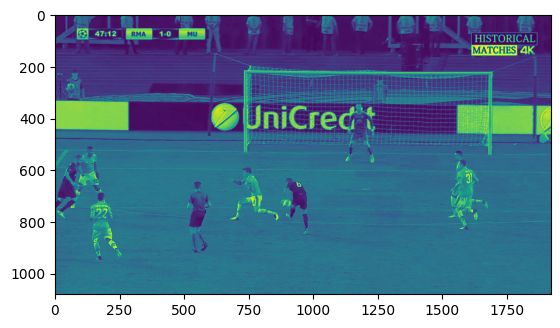

In [8]:
import matplotlib.pyplot as plt
a=plt.imread(original_images[2])
a=a[:,:,:1]
print(a.shape)
plt.imshow(a)

(1080, 1920, 1)


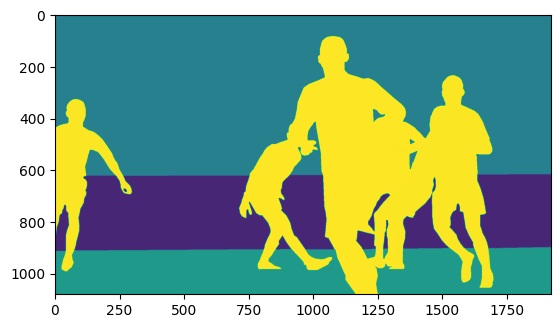

In [9]:
import matplotlib.pyplot as plt
a=plt.imread(fused_images[4])
a=a[:,:,:1]
print(a.shape)
plt.imshow(a)


In [10]:
#lets create the unet segmentation. model 
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import UpSampling2D,MaxPooling2D,concatenate,Conv2D,Input,Flatten,ZeroPadding2D,Reshape
from keras.utils import plot_model
from keras.models import Model

#in the first part we are basically reducing the size using the encoder network 

#the model  would take in  the input 1080x1920,3 , which would be reshaped to (3x1080)x1920 and the same would be the dimension 
input=Input((1024,1920,1))
#now we introduce the convolutional layers 
conv_1=Conv2D(64,3,activation='relu',padding='same')(input)
conv_2=Conv2D(64,3,activation='relu',padding='same')(conv_1) #
maxpool_1=MaxPooling2D()(conv_2)
conv_3=Conv2D(128,3,activation='relu',padding='same')(maxpool_1)
conv_4=Conv2D(128,3,activation='relu',padding='same')(conv_3) #
maxpool_2=MaxPooling2D()(conv_4)

conv_5=Conv2D(256,3,activation='relu',padding='same')(maxpool_2)
conv_6=Conv2D(256,3,activation='relu',padding='same')(conv_5)#
maxpool_3=MaxPooling2D()(conv_6)

conv_7=Conv2D(512,3,activation='relu',padding='same')(maxpool_3)
conv_8=Conv2D(512,3,activation='relu',padding='same')(conv_7) #


maxpool_4=MaxPooling2D()(conv_8)



conv_9=Conv2D(1024,3,activation='relu',padding='same')(maxpool_4)
conv_10=Conv2D(1024,3,activation='relu',padding='same')(conv_9) #
maxpool_5=MaxPooling2D()(conv_10)

conv_11=Conv2D(2048,3,activation='relu',padding='same')(maxpool_5)
conv_12=Conv2D(2048,3,activation='relu',padding='same')(conv_11) 

#now after this we use the upsample to get the required shape 
upsample_1=UpSampling2D()(conv_12)
c1=Conv2D(1024,2,activation='relu',padding='same')(upsample_1)
c1=concatenate([c1,conv_10])

d1_1=Conv2D(1024,3,activation='relu',padding='same')(c1)
d1_2=Conv2D(1024,3,activation='relu',padding='same')(d1_1)



upsample_2=UpSampling2D()(d1_2)
e1_1=Conv2D(512,2,activation='relu',padding='same')(upsample_2)
# Add ZeroPadding2D to add one row to the output


e1_1=concatenate([e1_1,conv_8])

k1_1=Conv2D(512,3,activation='relu',padding='same')(e1_1)
k1_2=Conv2D(512,3,activation='relu',padding='same')(k1_1)


upsample_3=UpSampling2D()(k1_2)
f1_1=Conv2D(256,2,activation='relu',padding='same')(upsample_3)
f1_1=concatenate([f1_1,conv_6])

conv1_1=Conv2D(256,3,activation='relu',padding='same')(f1_1)
conv1_2=Conv2D(256,3,activation='relu',padding='same')(conv1_1)



upsample_4=UpSampling2D()(conv1_2)
g1_1=Conv2D(128,2,activation='relu',padding='same')(upsample_4)
g1_1=concatenate([g1_1,conv_4])

conv2_1=Conv2D(128,3,activation='relu',padding='same')(g1_1)
conv2_2=Conv2D(128,3,activation='relu',padding='same')(conv2_1)



upsample_5=UpSampling2D()(conv2_2)
h1_1=Conv2D(64,2,activation='relu',padding='same')(upsample_5)
h1_1=concatenate([h1_1,conv_2])

conv2_1=Conv2D(64,3,activation='relu',padding='same')(h1_1)
conv2_2=Conv2D(64,3,activation='relu',padding='same')(conv2_1)


#we now give it to the convolutional layer
d5=Conv2D(2,3,activation='relu',padding='same')(conv2_2)
out=Conv2D(1,1,activation='sigmoid',padding='same')(d5)

model=Model(inputs=input,outputs=out)

model.summary()







2024-06-10 17:26:53.990042: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 17:26:53.990253: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 17:26:54.152913: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1024,      │          0 │ -                 │
│ (InputLayer)        │ 1920, 1)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 1024,      │        640 │ input_layer[0][0] │
│                     │ 1920, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 1024,      │     36,928 │ conv2d[0][0]      │
│                     │ 1920, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 512, 960,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 512, 960,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 512, 960,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 256, 480,  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 256, 480,  │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 256, 480,  │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 128, 240,  │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 128, 240,  │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 128, 240,  │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 64, 120,   │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 64, 120,   │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 120,   │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 32, 60,    │          0 │ conv2d_9[0][0]    │
│ (MaxPooling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 32, 60,    │ 18,876,416 │ max_pooling2d_4[

 Total params: 124,362,117 (474.40 MB)

 Trainable params: 124,362,117 (474.40 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#now lets plot the summary of the model 
plot_model(model,show_layer_names=True,show_shapes=True)

In [12]:
#now lets compile the model 
import keras
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'],run_eagerly=True
    )
  
            
    

In [13]:
#now lets split the data in the train and the test 
train_normal_images=[]
train_masked_images=[]

test_normal_images=[]
test_masked_images=[]



In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf
for i in range(10):
    a=plt.imread(original_images[i])
    resized_image = np.resize(a,(1024, 1920))

    train_normal_images.append(resized_image)
    
print("done")

done


In [15]:
import tensorflow as tf
for i in range(10):
    a=plt.imread(saved_images[i])
    resized_image = np.resize(a,(1024, 1920))
    train_masked_images.append(resized_image)
    #print(resized_image.shape)
print("done")

done


In [16]:
#now lets typecast them into numpy array
import numpy as np
train_normal_images=np.asarray(train_normal_images)
train_masked_images=np.asarray(train_masked_images)

In [ ]:
#now lets fit the data to the model 
model.fit(train_normal_images,train_masked_images,verbose=1,epochs=5,batch_size=5)


Epoch 1/5
